# Assignment 12

## Name: Harshilkumar Vaghela
## Student ID: 3116318

In [1]:
URL ="https://data.seattle.gov/api/views/675b-cqew/rows.csv?accessType=DOWNLOAD&bom=true&format=true"

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'westlake.csv')

('westlake.csv', <http.client.HTTPMessage at 0x2a4be0426c8>)

In [4]:
import pandas as pd
data1 = pd.read_csv('westlake.csv', index_col='Date', parse_dates=True)
data1.head()

,Westlake PBL and Newton St,North,South
Date,,,
2018-04-13 00:00:00,2.0,0.0,2.0
2018-04-13 01:00:00,3.0,1.0,2.0
2018-04-13 02:00:00,0.0,0.0,0.0
2018-04-13 03:00:00,1.0,1.0,0.0
2018-04-13 04:00:00,5.0,3.0,2.0


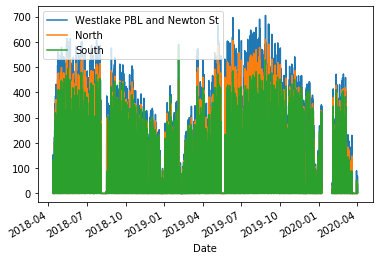

In [5]:
%matplotlib inline
#just to see how it will look in regular style we are not changing it to weekly
data1.plot();

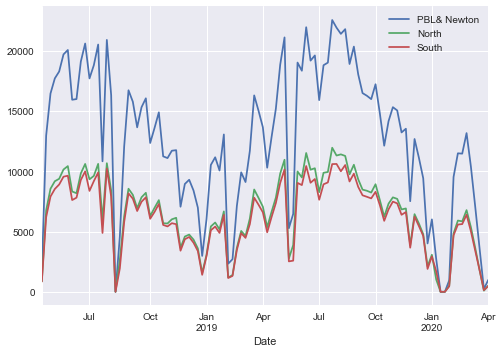

In [24]:
import matplotlib.pyplot as plt
plt.style.use('fast')


data1.columns = ['PBL@ Newton','North', 'South']



data1.resample('W').sum().plot();

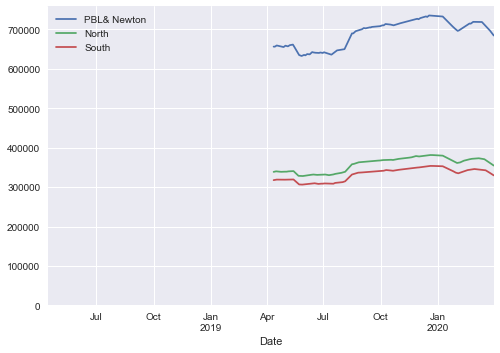

In [25]:
ax1 = data1.resample('D').sum().rolling(365).sum().plot();
ax1.set_ylim(0, None);

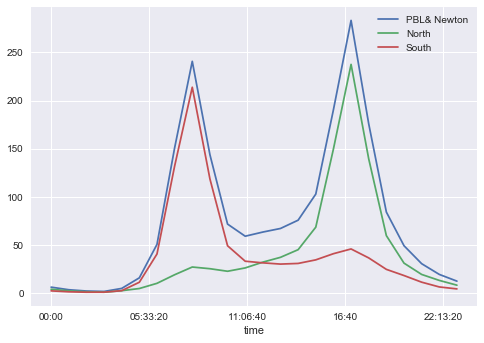

In [26]:
plt.style.use('seaborn')
data1.groupby(data1.index.time).mean().plot();

In [28]:
pivoted = data1.pivot_table('PBL@ Newton', index=data1.index.time, columns=data1.index.date)
pivoted.iloc[:5,:5]

,2018-04-13,2018-04-14,2018-04-15,2018-04-16,2018-04-17
00:00:00,2.0,2.0,2.0,1.0,1.0
01:00:00,3.0,0.0,1.0,0.0,1.0
02:00:00,0.0,2.0,1.0,0.0,2.0
03:00:00,1.0,0.0,1.0,1.0,0.0
04:00:00,5.0,1.0,3.0,6.0,7.0


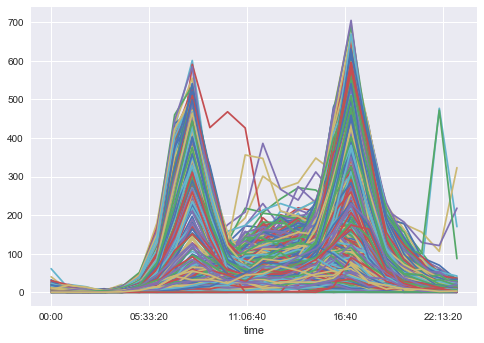

In [29]:
pivoted.plot(legend=False)

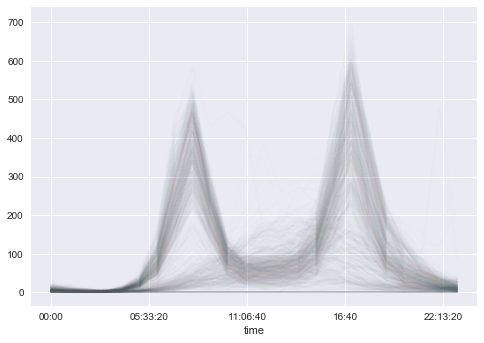

In [30]:
pivoted.plot(legend=False, alpha=0.01)

In [31]:
x = pivoted.fillna(0).T.values
x.shape

(695, 24)

In [32]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(x)

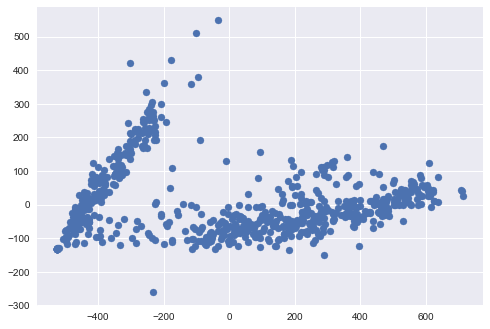

In [33]:
plt.scatter(X2[:, 0], X2[:, 1])

In [34]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(x)
lables= gmm.predict(x)
lables

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

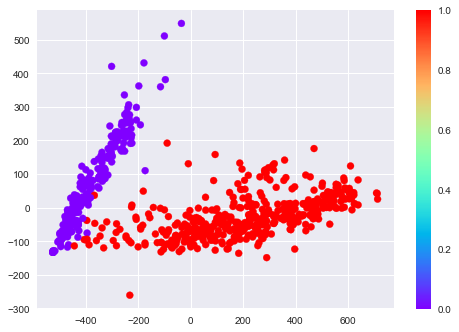

In [35]:
plt.scatter(X2[:, 0], X2[:, 1], c=lables, cmap='rainbow')
plt.colorbar()

In [36]:
daysOfWeek=pd.DatetimeIndex(pivoted.columns).dayofweek
daysOfWeek

Int64Index([4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
            ...
            6, 0, 1, 2, 3, 4, 5, 6, 0, 1],
           dtype='int64', length=695)

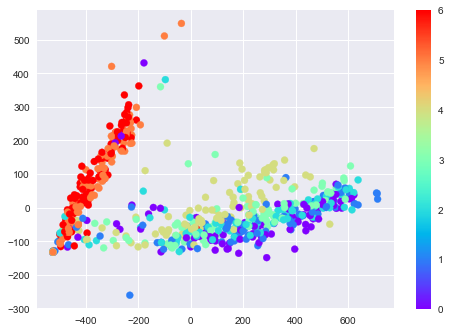

In [37]:
plt.scatter(X2[:, 0], X2[:, 1], c=daysOfWeek, cmap='rainbow')
plt.colorbar()

In [38]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(lables == 0) & (daysOfWeek < 5)]

DatetimeIndex(['2018-05-28', '2018-07-04', '2018-07-17', '2018-07-18',
               '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
               '2018-08-10', '2018-08-13', '2018-08-14', '2018-08-15',
               '2018-08-16', '2018-09-03', '2018-11-22', '2018-11-23',
               '2018-12-24', '2018-12-25', '2019-01-01', '2019-02-04',
               '2019-02-05', '2019-02-08', '2019-02-11', '2019-02-12',
               '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20',
               '2019-05-21', '2019-05-22', '2019-05-27', '2019-07-04',
               '2019-07-05', '2019-09-02', '2019-11-28', '2019-11-29',
               '2019-12-24', '2019-12-25', '2020-01-01', '2020-03-19',
               '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31'],
              dtype='datetime64[ns]', freq=None)

In [39]:
URL2 = 'https://data.seattle.gov/api/views/4qej-qvrz/rows.csv?accessType=DOWNLOAD&bom=true&format=true'

In [40]:
from urllib.request import urlretrieve
urlretrieve(URL2, 'elliot.csv')

('elliot.csv', <http.client.HTTPMessage at 0x2a4d7d56988>)

In [42]:
import pandas as pd
data2 = pd.read_csv('elliot.csv', index_col='Date', parse_dates=True)
data2.head()

,Elliott Bay Trail in Myrtle Edwards Park Total,Ped North,Ped South,Bike North,Bike South
Date,,,,,
2014-01-01 00:00:00,20,5,11,1.0,3.0
2014-01-01 01:00:00,7,2,3,1.0,1.0
2014-01-01 02:00:00,5,1,0,3.0,1.0
2014-01-01 03:00:00,4,2,0,1.0,1.0
2014-01-01 04:00:00,2,1,1,0.0,0.0


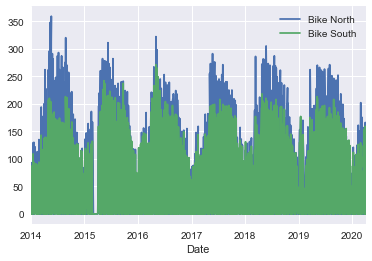

In [43]:
%matplotlib inline
#just to see how it will look in regular style we are not changing it to weekly
data2.plot();

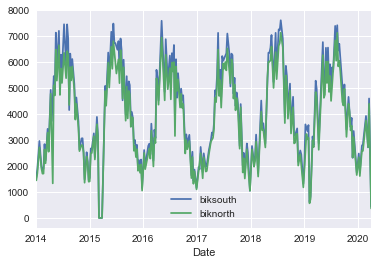

In [45]:
import matplotlib.pyplot as plt
plt.style.use('fast')


data2.columns = ['Total','pedsouth', 'pednorth','biksouth','biknorth']



data2.resample('W').sum().plot();

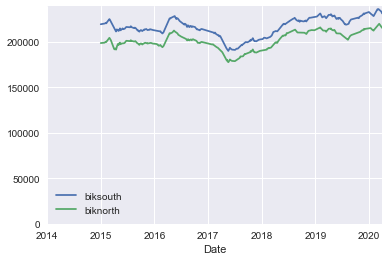

In [46]:
ax2 = data2.resample('D').sum().rolling(365).sum().plot();
ax2.set_ylim(0, None);

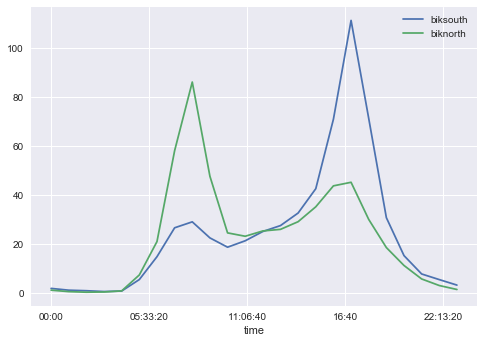

In [47]:
plt.style.use('seaborn')
data2.groupby(data2.index.time).mean().plot();